In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("trainKNN.txt",header = None)

In [3]:
dataset

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [4]:
dataset1 = pd.read_csv("testKNN.txt",header =None)
dataset1

,0,1,2,3,4,5,6,7,8,9,10
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [5]:
df = pd.concat([dataset,dataset1],axis=0)

In [6]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
13,184,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.0,6
14,185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
15,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
16,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
df.drop(0,axis=1,inplace=True)

In [8]:
df.columns = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"]

In [9]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
13,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.00,0.0,6
14,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.0,6
15,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
16,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [10]:
df.isnull().sum() # no missing values

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [11]:
df[df.duplicated()] # only one row is duplicated hence droped out

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [12]:
df.drop(39,axis=0,inplace =True)

In [13]:
import seaborn as sns

In [14]:
def boxplot(col):
    sns.boxplot(data=df,x=col)

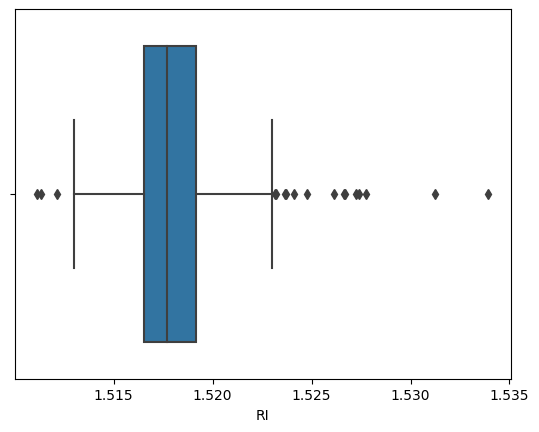

In [15]:
boxplot("RI")

([<matplotlib.axis.XTick at 0x23694f48c70>,
 [Text(1, 0, 'RI'),
  Text(2, 0, 'Na'),
  Text(3, 0, 'Mg'),
  Text(4, 0, 'Al'),
  Text(5, 0, 'Si'),
  Text(6, 0, 'K'),
  Text(7, 0, 'Ca'),
  Text(8, 0, 'Ba'),
  Text(9, 0, 'Fe'),
  Text(10, 0, 'Type of glass')])

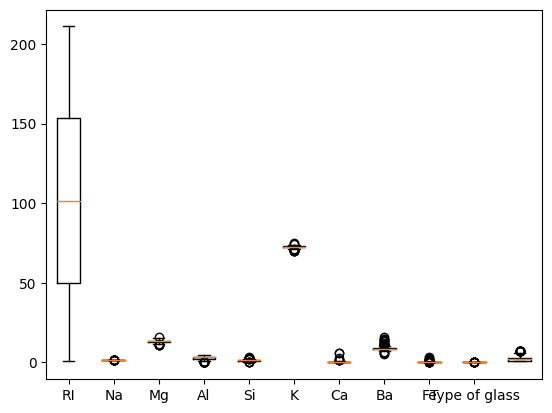

In [16]:
plt.boxplot(dataset)
plt.xticks(ticks = [1,2,3,4,5,6,7,8,9,10],labels =["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type of glass"])

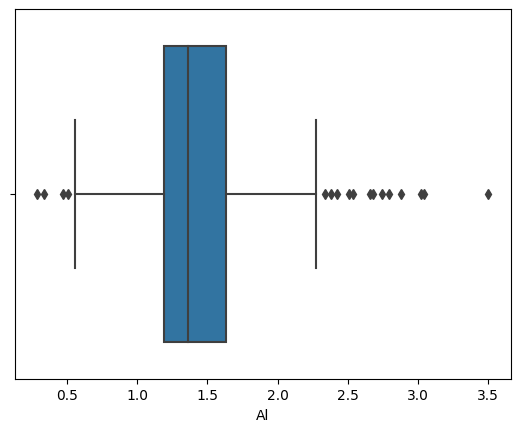

In [17]:
boxplot("Al")

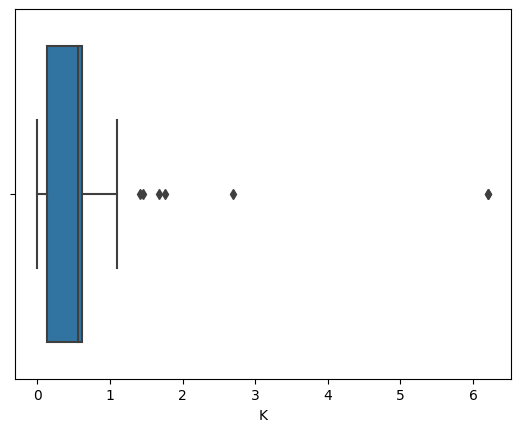

In [18]:
boxplot("K")

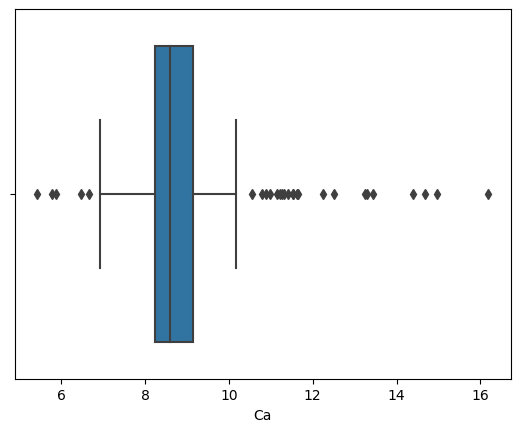

In [19]:
boxplot("Ca")

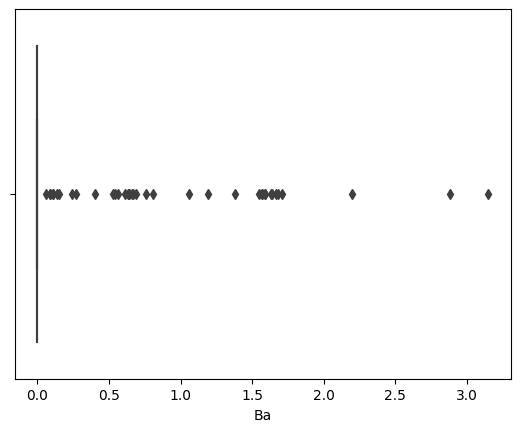

In [20]:
boxplot("Ba")

In [21]:
# as the dataset contain outliers and insight whether these data points needed are not known
# Also dataset contain only less number of dataset points i.e., 195
# will perform robust scale in future process.

## Types of glasess
* -1->  building_windows_float_processed
* -2-> building_windows_non_float_processed
* -3-> vehicle_windows_float_processed
* -4-> vehicle_windows_non_float_processed (none in this database)
* -5-> containers
* -6-> tableware
* -7-> headlamps

In [22]:
df["Type of glass"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

<AxesSubplot: >

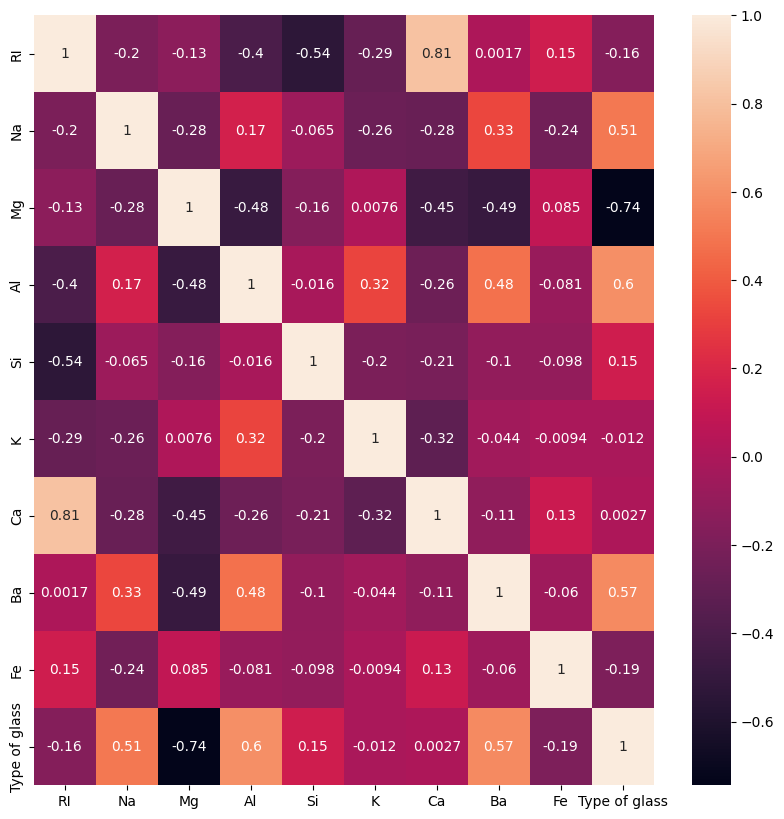

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Ri and Ca has strong postive correlation
### Mg and Types of glass have negative correlation to some extent

<AxesSubplot: xlabel='RI', ylabel='Ca'>

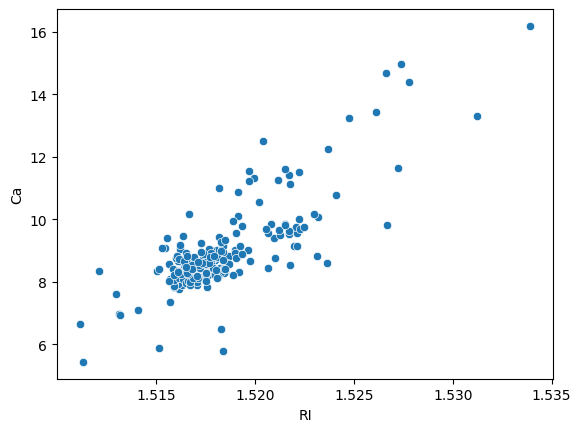

In [24]:
sns.scatterplot(data= df,x="RI",y="Ca")

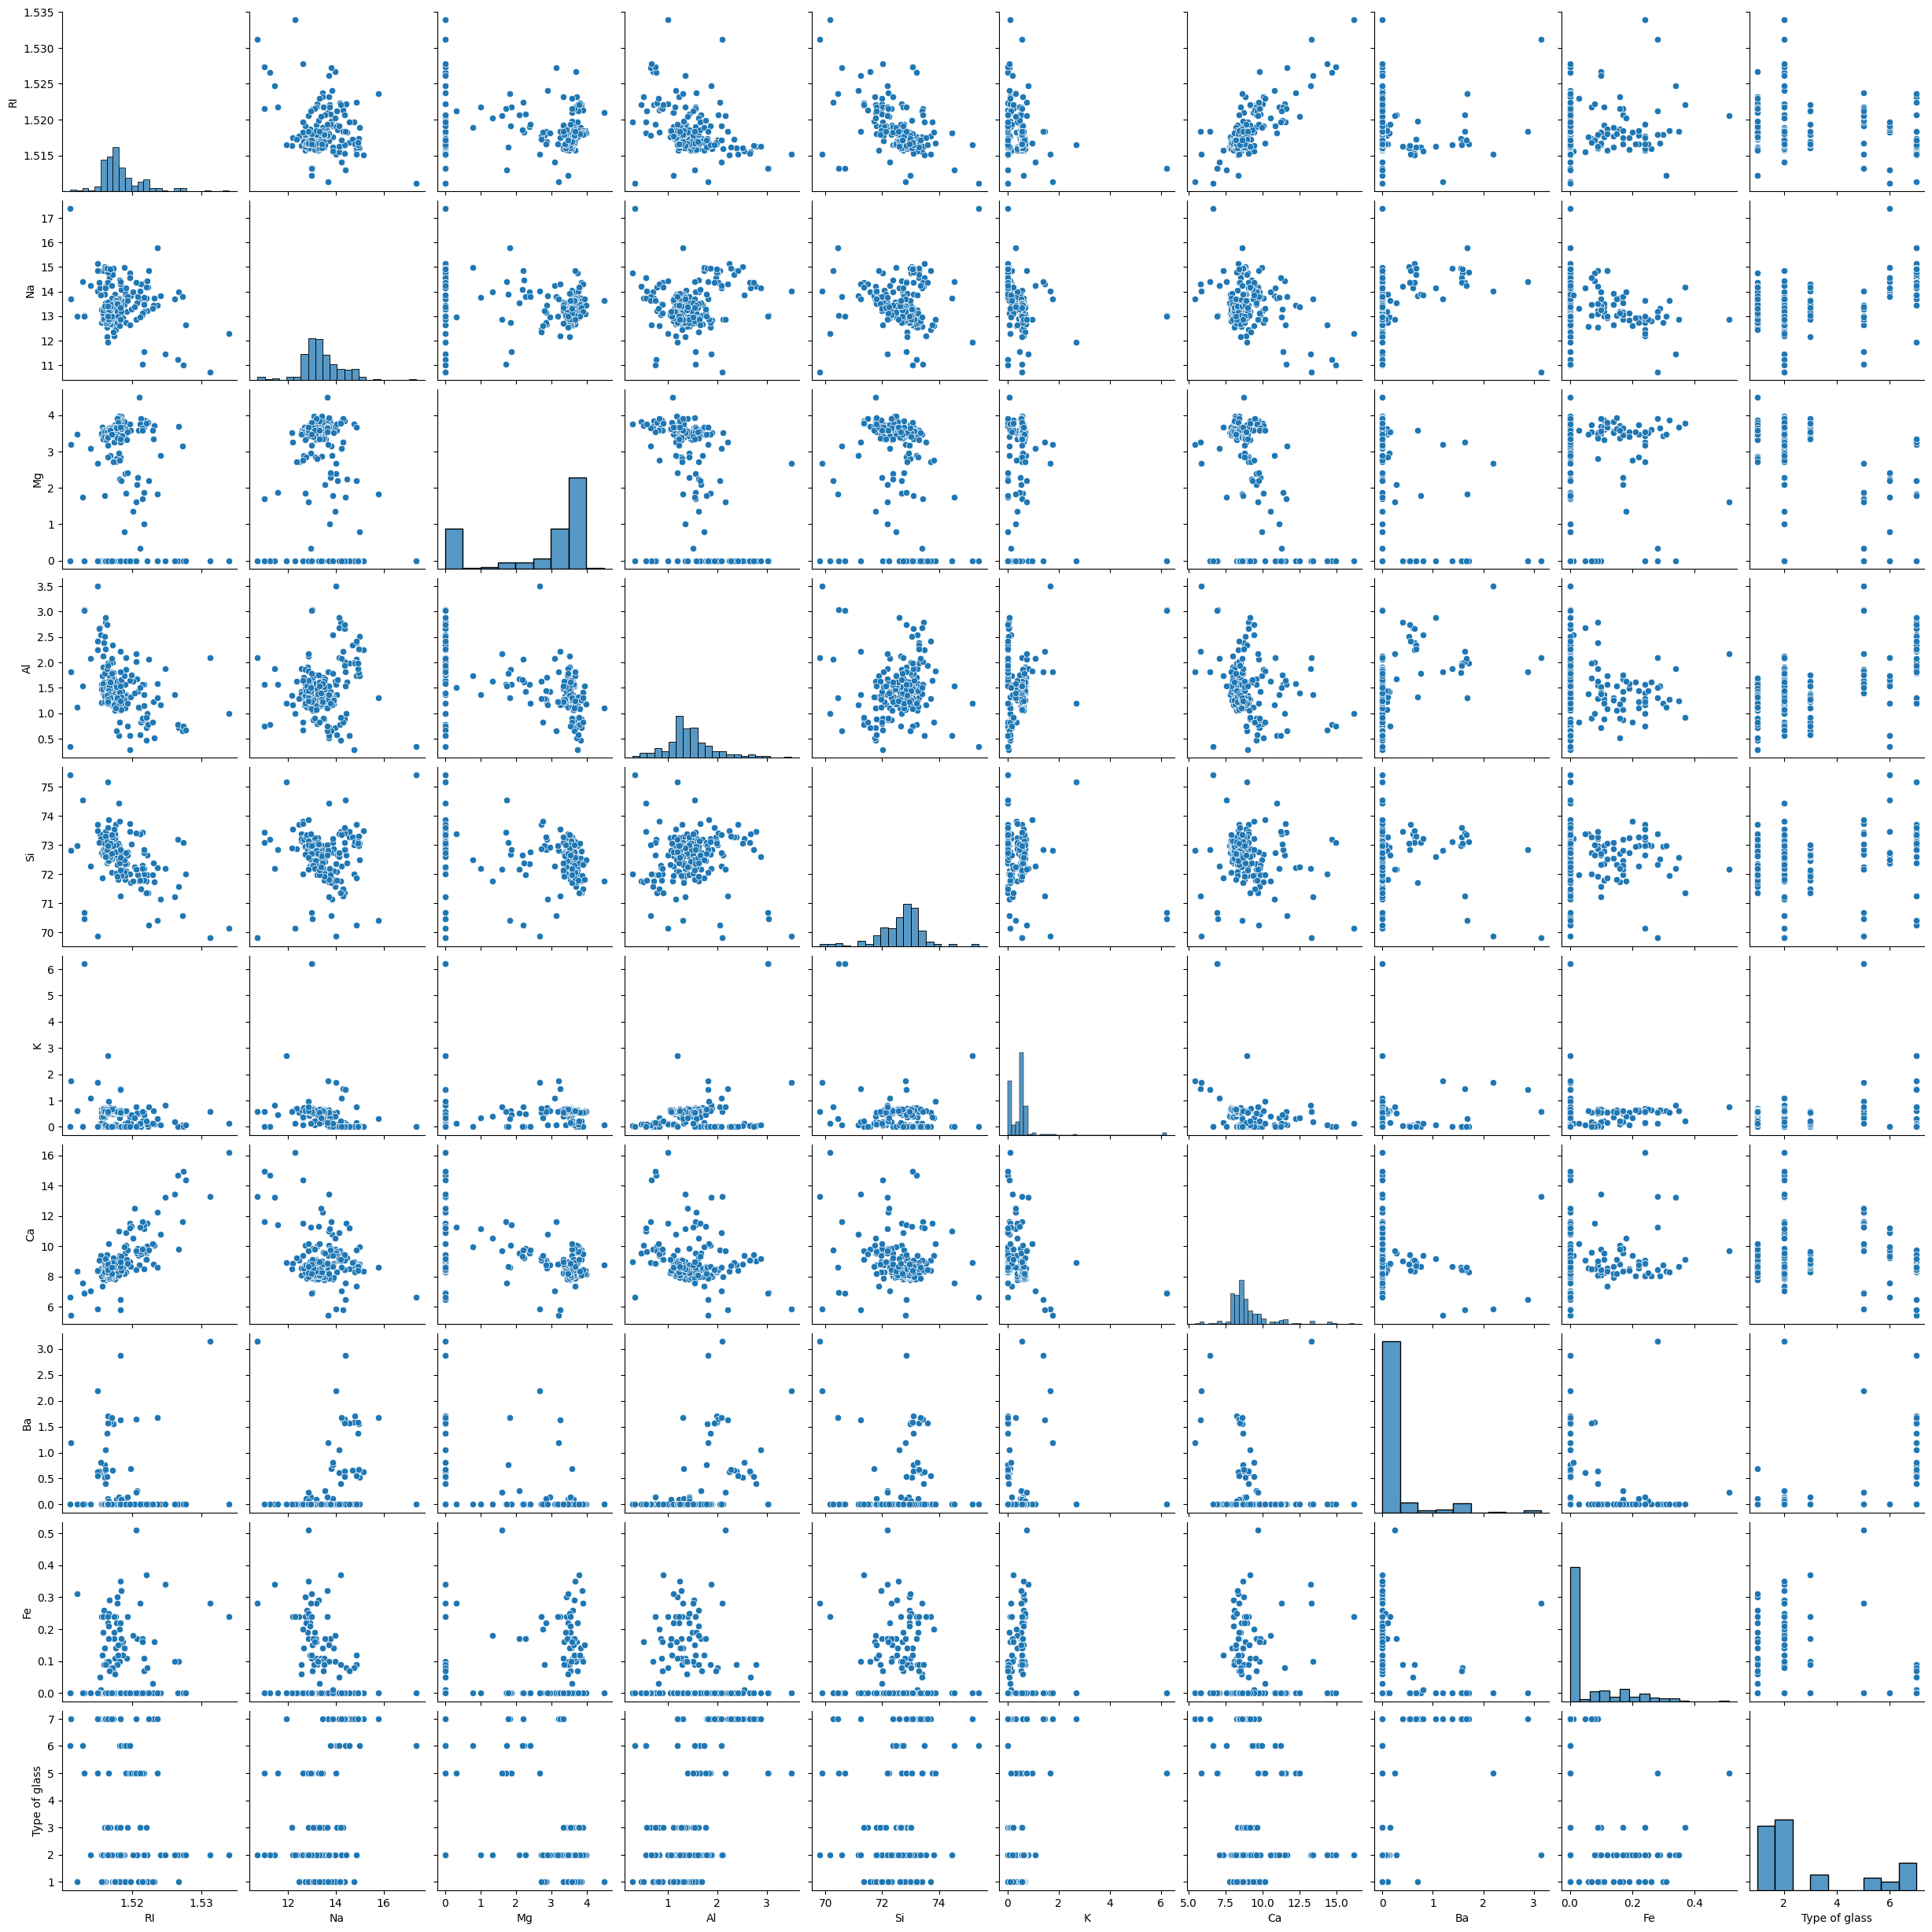

In [25]:
sns.pairplot(df)

In [26]:
# dataset shows the the not linear in all realtions

In [27]:
x= df.iloc[:,0:-1].values
y= df.iloc[:,-1].values

In [28]:
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [30]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(x_train)
x_train = rs.transform(x_train)
x_test = rs.fit_transform(x_test)

In [31]:
x_train

array([[ 0.04733728, -0.72222222,  0.11394303, ...,  0.12121212,
         0.        ,  0.        ],
       [-0.38658777, -0.51111111,  0.04797601, ..., -0.66115702,
         0.        ,  0.        ],
       [-0.41420118, -0.43333333,  0.07796102, ...,  0.01101928,
         0.        ,  0.        ],
       ...,
       [-0.42998028, -0.44444444,  0.03598201, ..., -0.61707989,
         0.        ,  2.33333333],
       [ 1.7790927 , -0.13333333,  0.17391304, ...,  1.57575758,
         0.        ,  0.        ],
       [ 1.87376726,  1.7       , -0.76761619, ...,  1.2892562 ,
         0.        ,  0.        ]])

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
score ={}
for j in range(1,50):
    KNN = KNeighborsClassifier(n_neighbors=j,metric="manhattan")
    KNN.fit(x_train,y_train)
    y_pred = KNN.predict(x_test)
    score[j] =accuracy_score(y_test,y_pred)

In [34]:
score

{1: 0.627906976744186,
 2: 0.5813953488372093,
 3: 0.5813953488372093,
 4: 0.5813953488372093,
 5: 0.627906976744186,
 6: 0.627906976744186,
 7: 0.5813953488372093,
 8: 0.627906976744186,
 9: 0.6046511627906976,
 10: 0.6511627906976745,
 11: 0.5813953488372093,
 12: 0.627906976744186,
 13: 0.5581395348837209,
 14: 0.5348837209302325,
 15: 0.5581395348837209,
 16: 0.5348837209302325,
 17: 0.5348837209302325,
 18: 0.5581395348837209,
 19: 0.5581395348837209,
 20: 0.5581395348837209,
 21: 0.5348837209302325,
 22: 0.5116279069767442,
 23: 0.4883720930232558,
 24: 0.4883720930232558,
 25: 0.4883720930232558,
 26: 0.4883720930232558,
 27: 0.4883720930232558,
 28: 0.46511627906976744,
 29: 0.5116279069767442,
 30: 0.4883720930232558,
 31: 0.4883720930232558,
 32: 0.4883720930232558,
 33: 0.4883720930232558,
 34: 0.46511627906976744,
 35: 0.46511627906976744,
 36: 0.4418604651162791,
 37: 0.46511627906976744,
 38: 0.4418604651162791,
 39: 0.4418604651162791,
 40: 0.4418604651162791,
 41: 0.465

In [35]:
y_pred = KNN.predict(x_test)

In [36]:
y_pred

array([1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 7, 1,
       1, 7, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 7, 1, 7, 1],
      dtype=int64)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[9, 2, 0, 0, 0, 0],
       [9, 6, 0, 0, 0, 0],
       [6, 1, 0, 0, 0, 0],
       [2, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 4]], dtype=int64)

<AxesSubplot: >

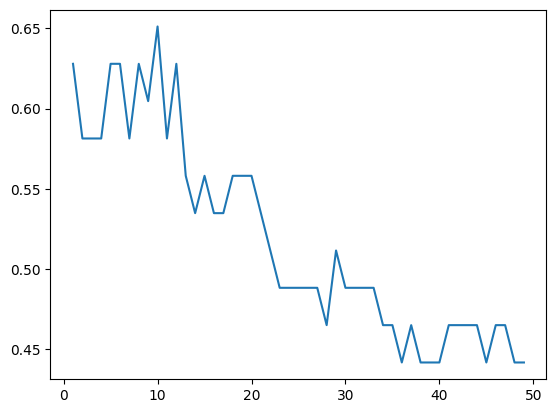

In [40]:
sns.lineplot(x=score.keys(),y=score.values())

In [43]:
K_NN = KNeighborsClassifier(n_neighbors=10,metric="manhattan")
K_NN.fit(x_train,y_train)
y_pred1 = K_NN.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred1)

0.6511627906976745

In [45]:
# the prediction accuracy obtained was 65%